Импорт библиотек

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных

In [285]:
Sales = pd.read_excel('data\Загрузка продажи.xlsx')
Stocks = pd.read_excel('data\Остатки загрузка.xlsx')
Nomen = pd.read_excel('data\Загрузка справочник.xlsx')

In [286]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ДАТА        3970 non-null   object 
 1   АРТИКУЛ     3970 non-null   int64  
 2   МЕНЕДЖЕР    3970 non-null   object 
 3   КЛИЕНТ      3970 non-null   object 
 4   ПРОДАЖА ШТ  3970 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 155.2+ KB


In [287]:
Sales.head(2)

,ДАТА,АРТИКУЛ,МЕНЕДЖЕР,КЛИЕНТ,ПРОДАЖА ШТ
0,06.03.2023 г.,101218,Абзалова Ольга Валерьевна,ЧЛ Талгат Айна базар,1.0
1,06.03.2023 г.,101459,Черноиванова Марина,ТОО Magnum Cash&Carry,1200.0


In [288]:
Sales['ДАТА'] = Sales['ДАТА'].apply(lambda x: x[:-3])
Sales['ДАТА'] = pd.to_datetime(Sales['ДАТА'], format='%d.%m.%Y')
Sales.head(2)

,ДАТА,АРТИКУЛ,МЕНЕДЖЕР,КЛИЕНТ,ПРОДАЖА ШТ
0,2023-03-06,101218,Абзалова Ольга Валерьевна,ЧЛ Талгат Айна базар,1.0
1,2023-03-06,101459,Черноиванова Марина,ТОО Magnum Cash&Carry,1200.0


In [289]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21119 entries, 0 to 21118
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ДАТА     21119 non-null  object 
 1   АРТИКУЛ  21119 non-null  int64  
 2   РАСХОД   21119 non-null  float64
 3   ОСТАТОК  21119 non-null  float64
 4   ЦЕНА     21119 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 825.1+ KB


In [290]:
Stocks.head()

,ДАТА,АРТИКУЛ,РАСХОД,ОСТАТОК,ЦЕНА
0,06.03.2023,100160,0.0,23495.0,3.06
1,06.03.2023,100527,0.0,3800.0,43.70
2,06.03.2023,100701,0.0,14.0,1417.11
3,06.03.2023,101032,0.0,395.0,437.33
4,06.03.2023,101218,1.0,8.0,4710.22


In [291]:
Stocks['ДАТА'] = pd.to_datetime(Stocks['ДАТА'] , format='%d.%m.%Y')
Stocks.head(2)

,ДАТА,АРТИКУЛ,РАСХОД,ОСТАТОК,ЦЕНА
0,2023-03-06,100160,0.0,23495.0,3.06
1,2023-03-06,100527,0.0,3800.0,43.70


In [292]:
Stocks['ДАТА'].min()

Timestamp('2023-03-06 00:00:00')

In [293]:
Nomen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   АРТИКУЛ     456 non-null    int64 
 1   ТОВАР       456 non-null    object
 2   ПРЯМОЙ      456 non-null    int64 
 3   ПОСТАВЩИК   456 non-null    object
 4   АКТИВНОСТЬ  456 non-null    object
 5   АГ          456 non-null    object
 6   НГ          456 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.1+ KB


Создадим таблицу по параметрам артикулов и добавим в нее параметры, связанные с клиентами и статистикой продаж

*Число клиентов*

In [294]:
table = Sales.groupby('АРТИКУЛ')['КЛИЕНТ'].nunique()

In [295]:
Client_count = list(Nomen['АРТИКУЛ'].unique())
Client_count = pd.DataFrame(Client_count, columns=['АРТИКУЛ'])
Client_count['Count'] = Client_count['АРТИКУЛ'].apply(lambda x: 0 if x not in list(table.index) else table[x])
Client_count.index = Client_count['АРТИКУЛ']
Client_count = Client_count.drop('АРТИКУЛ', axis=1)

In [296]:
piv_nom = Nomen.copy()
piv_nom['КЛИЕНТОВ'] = piv_nom['АРТИКУЛ'].apply(lambda x: Client_count.loc[x])

*Доля самого крупного клиента*

In [297]:
table = Sales.groupby(['АРТИКУЛ', 'КЛИЕНТ'])['ПРОДАЖА ШТ'].sum().reset_index().sort_values(by=['АРТИКУЛ','ПРОДАЖА ШТ'], ascending=False)
table2 = Sales.groupby(['АРТИКУЛ'])['ПРОДАЖА ШТ'].sum().sort_values(ascending=False).reset_index()
table = pd.merge(left=table, right=table2, on='АРТИКУЛ', how='left')
table['ДОЛЯ'] = table['ПРОДАЖА ШТ_x'] / table['ПРОДАЖА ШТ_y']
table = table.groupby('АРТИКУЛ')['ДОЛЯ'].max()
piv_nom['ДОЛЯ МАКС КЛИЕНТА'] = piv_nom['АРТИКУЛ'].apply(lambda x: 0 if x not in list(table.index) else table.loc[x])
piv_nom.head(2)

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148


*Загрузка средней цены за период*

In [298]:
table = Stocks.groupby('АРТИКУЛ')['ЦЕНА'].median()
piv_nom['ЦЕНА'] = piv_nom['АРТИКУЛ'].apply(lambda x: 0 if x not in list(table.index) else table.loc[x])
piv_nom.head(2)

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА,ЦЕНА
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404,99.55
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148,3.13


*Вычисление стат параметров стока и продаж*

In [299]:
table = pd.pivot_table(Stocks,values='ОСТАТОК',aggfunc='sum',columns='АРТИКУЛ', index='ДАТА').sort_index()
stock_nulls = table.isnull().mean()
table = table.fillna(0)
table.describe()

АРТИКУЛ,100084,100160,100420,100527,100701,100821,100830,100843,101032,101218,...,451454,451455,451456,451457,451458,451606,451607,505205,591810,591830
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,268.514706,8019.264706,14.779412,1932.352941,4.941176,847.058824,750.000000,693.382353,242.470588,6.691176,...,2.647059,3.529412,5.294118,1.588235,2.647059,0.176471,0.176471,0.147059,114.838235,28.852941
std,388.804885,5837.949335,19.013621,1519.391195,6.236346,905.121512,1790.313906,480.974168,101.003247,0.850941,...,5.760816,7.681089,11.521633,4.096723,5.760816,0.384054,0.384054,0.525888,22.629798,21.442227
min,0.000000,0.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000
25%,0.000000,5295.000000,0.000000,380.000000,0.000000,0.000000,0.000000,475.000000,234.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000
50%,0.000000,8000.000000,0.000000,3380.000000,0.000000,0.000000,0.000000,550.000000,259.500000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,37.000000
75%,425.000000,8000.000000,40.000000,3380.000000,14.000000,1800.000000,0.000000,800.000000,284.000000,7.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,37.000000
max,1000.000000,23495.000000,40.000000,3800.000000,14.000000,1800.000000,8000.000000,2400.000000,395.000000,8.000000,...,15.000000,20.000000,30.000000,12.000000,15.000000,1.000000,1.000000,2.000000,140.000000,57.000000


In [300]:
piv_nom = pd.merge(left=piv_nom, right=table.describe().T.reset_index()[['АРТИКУЛ','mean','std','max','50%']], on='АРТИКУЛ', how='left')
piv_nom = piv_nom.rename({'mean':'stocks_mean','std':'stocks_std', 'max':'stocks_max','50%':'stocks_median'}, axis=1)
piv_nom.head(2)

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА,ЦЕНА,stocks_mean,stocks_std,stocks_max,stocks_median
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404,99.55,268.514706,388.804885,1000.0,0.0
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148,3.13,8019.264706,5837.949335,23495.0,8000.0


In [301]:
table2 = pd.pivot_table(Sales,values='ПРОДАЖА ШТ',aggfunc='sum',columns='АРТИКУЛ', index='ДАТА').sort_index()
sales_nulls = table2.isnull().mean()
table2 = table2.fillna(0)
table2.describe()

АРТИКУЛ,100084,100160,100420,100527,100701,100830,100843,101032,101218,101226,...,294016,296140,307971,307973,342045,342047,450743,451423,451457,505205
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.655738,254.016393,0.655738,6.885246,0.229508,98.360656,32.786885,5.360656,0.049180,0.311475,...,3.114754,1.639344,0.852459,0.360656,0.327869,0.622951,0.114754,0.262295,0.196721,0.032787
std,131.321728,838.312203,3.705335,51.236087,1.055043,650.766677,145.454817,14.272389,0.218039,2.432701,...,16.180336,12.803688,3.745380,2.105808,1.795562,3.337484,0.776710,2.048590,1.536443,0.256074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,901.000000,5000.000000,25.000000,400.000000,6.000000,5000.000000,800.000000,80.000000,1.000000,19.000000,...,90.000000,100.000000,24.000000,15.000000,10.000000,24.000000,6.000000,16.000000,12.000000,2.000000


In [302]:
piv_nom = pd.merge(left=piv_nom, right=table2.describe().T.reset_index()[['АРТИКУЛ','mean','std','max','50%']], on='АРТИКУЛ', how='left')
piv_nom = piv_nom.rename({'mean':'sales_mean','std':'sales_std', 'max':'sales_max','50%':'sales_median'}, axis=1)
piv_nom.head(2)

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА,ЦЕНА,stocks_mean,stocks_std,stocks_max,stocks_median,sales_mean,sales_std,sales_max,sales_median
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404,99.55,268.514706,388.804885,1000.0,0.0,24.655738,131.321728,901.0,0.0
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148,3.13,8019.264706,5837.949335,23495.0,8000.0,254.016393,838.312203,5000.0,0.0


*Добавим признаки % дней без продаж и без остатков*

In [303]:
piv_nom['sales_nulls'] = piv_nom['АРТИКУЛ'].apply(lambda x: 0 if x not in list(sales_nulls.index) else sales_nulls[x])
piv_nom['stock_nulls'] = piv_nom['АРТИКУЛ'].apply(lambda x: 0 if x not in list(stock_nulls.index) else stock_nulls[x])
piv_nom.head(2)

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА,ЦЕНА,stocks_mean,stocks_std,stocks_max,stocks_median,sales_mean,sales_std,sales_max,sales_median,sales_nulls,stock_nulls
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404,99.55,268.514706,388.804885,1000.0,0.0,24.655738,131.321728,901.0,0.0,0.918033,0.529412
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148,3.13,8019.264706,5837.949335,23495.0,8000.0,254.016393,838.312203,5000.0,0.0,0.852459,0.029412


*Добавим признак симметрии. Рассчитаем его как ковариацию вектора последовательных продаж с вектором линейного роста от минимума к максимуму*

In [304]:
def calc_sym_coef(art, table):
    min_val = table[art].min()
    max_val = table[art].max()
    v = np.linspace(min_val,max_val,table.shape[0])
    w = table[art].values
    v = v - v.mean()
    v = v / np.linalg.norm(v)
    w = w - w.mean()
    if np.linalg.norm(w)<0.0001:
        return 0
    w = w /np.linalg.norm(w)
    return v@w

calc_sym_coef(100084, table2)

0.19793287058644524

In [309]:
piv_nom['stock_sym'] = piv_nom['АРТИКУЛ'].apply(lambda x: calc_sym_coef(x,table))
piv_nom['sales_sym'] = piv_nom['АРТИКУЛ'].apply(lambda x: 0 if x not in list(table2.columns) else calc_sym_coef(x,table2))
piv_nom.head()

,АРТИКУЛ,ТОВАР,ПРЯМОЙ,ПОСТАВЩИК,АКТИВНОСТЬ,АГ,НГ,КЛИЕНТОВ,ДОЛЯ МАКС КЛИЕНТА,ЦЕНА,...,stocks_max,stocks_median,sales_mean,sales_std,sales_max,sales_median,sales_nulls,stock_nulls,stock_sym,sales_sym
0,100084,"Перчатки одноразовые ""Elpi"", размер M, 6 мкм, ...",0,ЭЛПИ-ТРЕЙД ООО,Да,Средства индивидуальной защиты,Перчатки ПЭ стандартной прочности размер M,5,0.598404,99.55,...,1000.0,0.0,24.655738,131.321728,901.0,0.0,0.918033,0.529412,0.464901,0.197933
1,100160,"Стакан одноразовый 100 мл ""Сп"", прозр., ПП, 10...",0,ПолиЭр ООО,Да,"Стаканы, чашки, крышки для стаканов",Стаканы ПП до 200 мл прозрачные,8,0.258148,3.13,...,23495.0,8000.0,254.016393,838.312203,5000.0,0.0,0.852459,0.029412,-0.458526,0.134252
2,100420,"Салфетки ажурные d 260 мм ""Buffet"", бел., бум....",0,ГУСЛИЦА ООО,Да,Салфетки сервировочные и для диспенсеров,Салфетки сервировочные ажурные D от 20 см,2,0.625000,399.15,...,40.0,0.0,0.655738,3.705335,25.0,0.0,0.967213,0.588235,0.604506,0.234365
3,100527,"Стакан бумажный 300 мл 2 сл., d90 мм, бел., ка...",0,ПАПЕРСКОП РУС ООО,Да,"Стаканы, чашки, крышки для стаканов","Стаканы бумажные 300-390 мл белые, крафт 2-сло...",2,0.952381,40.63,...,3800.0,3380.0,6.885246,51.236087,400.0,0.0,0.967213,0.000000,-0.869719,-0.220612
4,100701,"Пленка стрейч 500мм х 170м, 1,5 кг, 17 мкм, пр...",0,ПТП ФАБРИКА УПАКОВКИ ООО,Да,Пленки непищевые,Пленки стрейч,3,0.428571,1417.11,...,14.0,0.0,0.229508,1.055043,6.0,0.0,0.950820,0.544118,-0.877616,-0.099661


Визуализация по конкретному артикулу

<AxesSubplot: xlabel='ДАТА', ylabel='100420'>

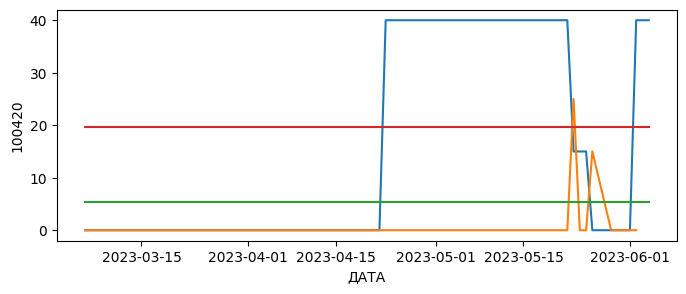

In [311]:
art =100420

fig, ax = plt.subplots(1,1, figsize = [8,3])
sns.lineplot(table[art].T, ax=ax)
sns.lineplot(table2[art].T, ax=ax)
line = pd.DataFrame(table[art].T.copy())

mean_level = table2.describe().T.loc[101032]['mean']
std_level = mean_level + table2.describe().T.loc[101032]['std']

line['mean'] = mean_level
line['std'] = std_level
line
sns.lineplot(line['mean'], ax=ax)
sns.lineplot(line['std'], ax=ax)
